<a href="https://colab.research.google.com/github/maxenlee/DataScienceToolBox/blob/main/Maxen%7CProject6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.



In [ ]:

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.preprocessing import minmax_scale

import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model

import requests
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image
import numpy as np
from io import BytesIO



In [ ]:
link_1 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
link_2 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
link_3 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [ ]:
X = pickle.loads(requests.get(link_1).content)
y = np.array(pickle.loads(requests.get(link_2).content))



In [ ]:
y[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:

# Step 1: Fetch the image from the URL
response = requests.get(link_3)

# Step 2: Open the image with PIL
img = Image.open(BytesIO(response.content))

# Assuming you need to resize the image to 224x224 as before
img = img.resize((100, 100))

# Convert the image to a NumPy array
img_array = img_to_array(img)

# Normalize the pixel values (adjust this according to your model's needs)
img_array = preprocess_input(img_array)

# Expand dimensions to match the model's expected input shape
test = np.expand_dims(img_array, axis=0)

# Now 'img_array' is ready to be used as input to your model.


In [ ]:
# test

In [ ]:
test.shape

(1, 100, 100, 3)

In [ ]:
y.shape

(24946,)

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [ ]:
print(X.shape,'\n',
      X[0].shape,'\n',
      X[0][0].shape,'\n',
      X[0][0][0].shape,'\n',
      X[0][0][0][0].shape)


(24946, 100, 100, 1) 
 (100, 100, 1) 
 (100, 1) 
 (1,) 
 ()


In [ ]:
X[0][0][0][0]

95

In [ ]:
data_size = X.shape[0]
data_size

24946

In [ ]:
f'{X.size:_}'

'249_460_000'

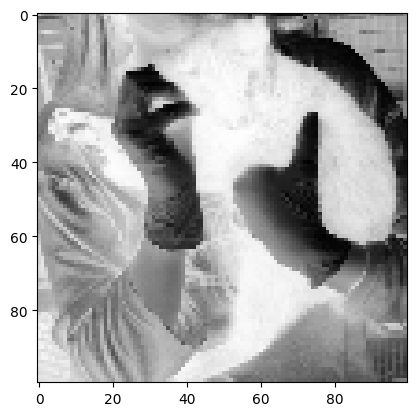

In [ ]:
plt.imshow(X[1600]
           , cmap = plt.cm.gray_r)

In [ ]:
print(X.min())
print(X.max())

0
255


In [ ]:
# X = X / 255
X.shape

(24946, 100, 100, 1)

In [ ]:
# Step 1: Flatten each image to a 1D array
X_flattened = X.flatten()
X_flattened.shape

(249460000,)

In [ ]:
# Step 2: Apply minmax_scale across each image (row)
X_scaled = minmax_scale(X_flattened)

In [ ]:
X_scaled.shape

(249460000,)

In [ ]:
# print(max(X_scaled))

In [ ]:
np.max(X_scaled)

1.0

In [ ]:
X_scaled.max()

1.0

In [ ]:
X_flattened.max()


255

In [ ]:

# Step 3: Reshape back to original shape
X_scaled_T4 = X_scaled.reshape(X.shape)

# Now X_scaled should have the same shape as X, but with pixel values scaled to [0, 1]


In [ ]:
X_scaled_T4.shape

(24946, 100, 100, 1)

Checking for bias in target

In [ ]:
ysum = sum(y)
ylen = len(y)
print(ylen/ysum)

1.999519076627124


## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot one of the images in X using plt.imshow().

* Look at the response value in y for that image.



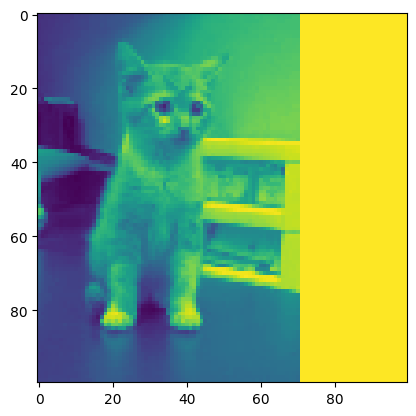

In [ ]:
ran = np.random.randint(data_size)
plt.imshow(X[ran])

## Data Processing


In [ ]:
f = (X - X.min())/(X.max()-X.min())
f.max()

1.0


* Split X and y into training and testing sets.

*  Build a neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: numpy.ndarray.reshape

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



### Split Train

In [ ]:
# rand = np.random.seed(42)
split_size = data_size // 5
split_size

4989

In [ ]:
split_size/data_size

0.1999919826825944

In [ ]:


X_train= X_scaled_T4[split_size:]
X_test= X_scaled_T4[:split_size]
y_train= y[split_size:]
y_test= y[:split_size]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(19957, 100, 100, 1)
(4989, 100, 100, 1)
(19957,)
(4989,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building layers

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Create a Sequential model
model = Sequential()

# Specify the input shape
model.add(Input(shape=X_train.shape[1:]))

# Add the first convolutional layer
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

# Add the first max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

# Add the second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add the output layer with 'sigmoid' activation
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics= ['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │        33,857 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,425 (279.00 KB)

 Trainable params: 71,425 (279.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5864 - loss: 0.6631
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7495 - loss: 0.5138
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7827 - loss: 0.4612
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8103 - loss: 0.4205
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8211 - loss: 0.3936
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8427 - loss: 0.3587
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8647 - loss: 0.3210
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8725 - loss: 0.3008
Epoch 9/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8896 - loss: 0.2704
Epoch 10/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8975 - loss: 0.2483


In [ ]:

# Evaluate the model
model.evaluate(X_test, y_test)


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7961 - loss: 0.4904


[0.4878939092159271, 0.7949488759040833]

# Make a prediction

In [ ]:
test.shape

(1, 100, 100, 3)

In [ ]:
test[0].shape

(100, 100, 3)

In [ ]:
print(np.max(test))
print(np.min(test))
print(np.max(test)-np.min(test))

138.22101
-105.779
244.0


In [ ]:
import numpy as np

def convert_to_grayscale(image):
    """
    Convert a color image to grayscale.

    Parameters:
    - image: A NumPy array of shape (height, width, 3), representing an RGB image.

    Returns:
    - A NumPy array of shape (height, width, 1), representing a grayscale image.
    """
#     # Check if the image is already in the expected shape
#     if image.shape[-1] != 3:
#         raise ValueError("Input image must have 3 channels.")

    # Apply the conversion formula
    grayscale = 0.2989 * image[:,:, :, 0] + 0.5870 * image[:,:, :, 1] + 0.1140 * image[:,:, :, 2]

    # Reshape the grayscale image to add an extra dimension
    grayscale = grayscale[:, :,:, np.newaxis]

    return grayscale

# Assuming `image` is your (100, 100, 3) RGB image array
# image = np.random.rand(100, 100, 3)  # Example placeholder; replace with your image array
# grayscale_image = convert_to_grayscale(image)

# Now `grayscale_image` will have the shape (100, 100, 1)


In [ ]:
test_scaled = (test - test.min())/(test.max()-test.min())
test_scaled.max()

1.0

In [ ]:
image = convert_to_grayscale(test_scaled)
print(image.shape)
print(np.min(image))
print(np.max(image))

(1, 100, 100, 1)
0.008892463
0.9879048


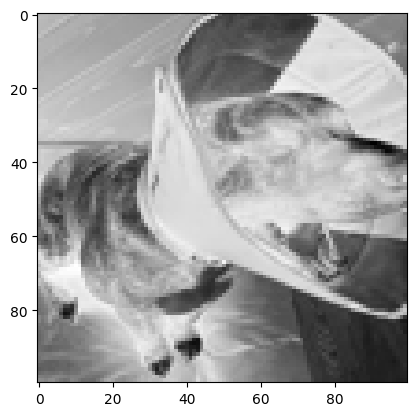

In [ ]:
plt.imshow(image[0]
           , cmap = plt.cm.gray_r)


In [ ]:

# Predict whether the image is a dog or a cat
prediction = model.predict(image)

# Print the prediction
print(prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
[[0.3084375]]


## Communication of Results



* Communicate the results of your analysis.



## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.

In [ ]:
def image_predictor(link, rotation = 0):
    link_nova= link

    # Step 1: Fetch the image from the URL
    response_nova = requests.get(link_nova)

    # Step 2: Open the image with PIL
    img_nova = Image.open(BytesIO(response_nova.content))

    img_nova = img_nova.resize((100, 100))

    img_nova = img_nova.rotate(rotation)

    # Convert the image to a NumPy array
    img_array_nova = img_to_array(img_nova)

    # Normalize the pixel values (adjust this according to your model's needs)
    # img_array_nova = preprocess_input(img_array_nova)

    img_array_nova = (img_array_nova - img_array_nova.min())/(img_array_nova.max()-img_array_nova.min())

    # Expand dimensions to match the model's expected input shape
    test_nova = np.expand_dims(img_array_nova, axis=0)

    plt.imshow(test_nova[0]
           , cmap = plt.cm.gray_r )

    plt.show()
    # Now 'img_array' is ready to be used as input to your model.
    image_nova = convert_to_grayscale(test_nova)

    plt.imshow(image_nova[0]
           , cmap = plt.cm.gray_r)
    plt.show()

    # Predict whether the image is a dog or a cat
    output = model.predict(image_nova)

    # Threshold for deciding between categories
    threshold = 0.5

    # Determine the predicted class and its confidence
    predicted_class = "cat" if output >= threshold else "dog"
    confidence = output if predicted_class == "cat" else 1 - output

    # Formatting the output
    formatted_output = f"Predicted class: {predicted_class} with confidence: {confidence[0][0]*100:.2f}%"

    print(formatted_output)

In [ ]:
link_nova= 'https://picklejar.nyc3.digitaloceanspaces.com/Images/Nova_fluff.JPEG'

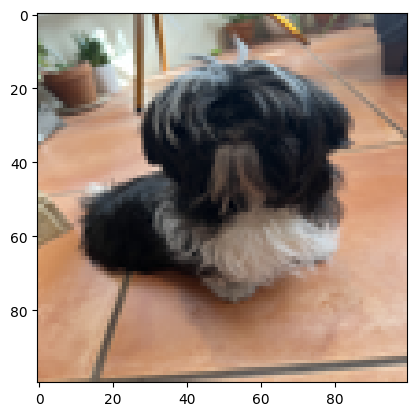

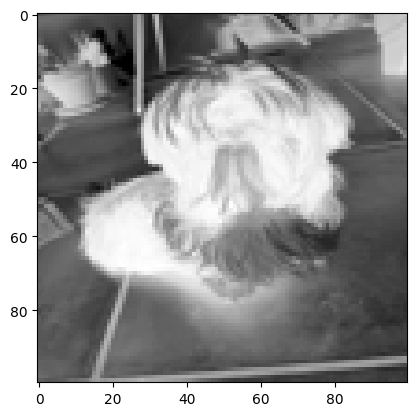

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: dog with confidence: 67.29%


In [ ]:
image_predictor(link_nova,270)

In [ ]:
picklejar_link_1 = 'https://picklejar.nyc3.digitaloceanspaces.com/Images/B77DFC1B-F014-45B0-974F-BF9A0D8C739E_1_102_o.jpeg'
picklejar_link_2 = 'https://picklejar.nyc3.digitaloceanspaces.com/Images/8FD6B9B0-4297-4D61-884E-2D94F6DC1FDF_1_105_c.jpeg'
picklejar_link_3 = 'https://picklejar.nyc3.digitaloceanspaces.com/Images/8B9D11F4-8AD2-4C43-95AC-8504FEEB7670.jpeg'
picklejar_link_4 = 'https://picklejar.nyc3.digitaloceanspaces.com/Images/10AE30A6-E631-4975-9745-6027FDEBB0DA_4_5005_c.jpeg'

In [ ]:
image_predictor(picklejar_link_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: cat with confidence: 92.64%


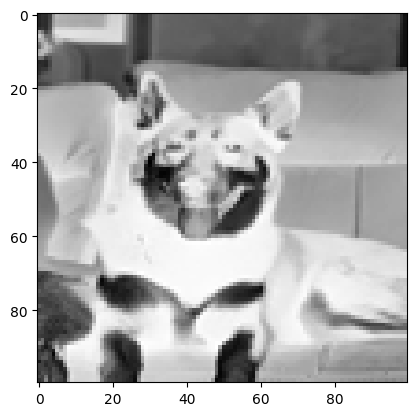

In [ ]:
image_predictor(picklejar_link_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: dog with confidence: 93.45%


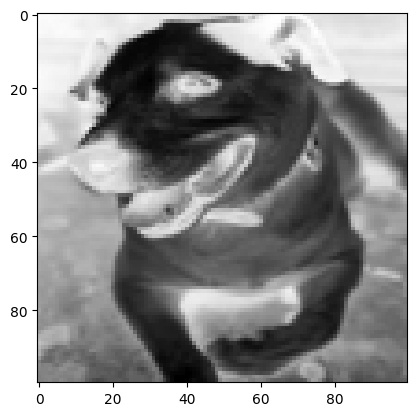

In [ ]:
image_predictor(picklejar_link_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: cat with confidence: 92.64%


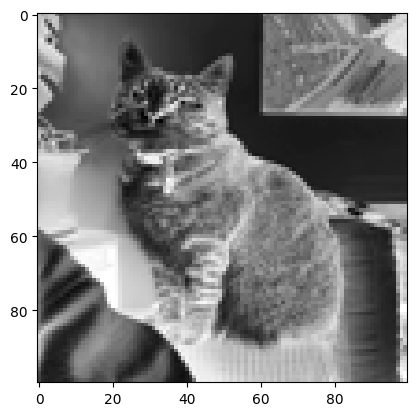

In [ ]:
image_predictor(picklejar_link_4)